In [20]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from mpl_toolkits.axes_grid.inset_locator import inset_axes

sys.path.append('../../../../code/python')
from mpl_settings_v3 import *

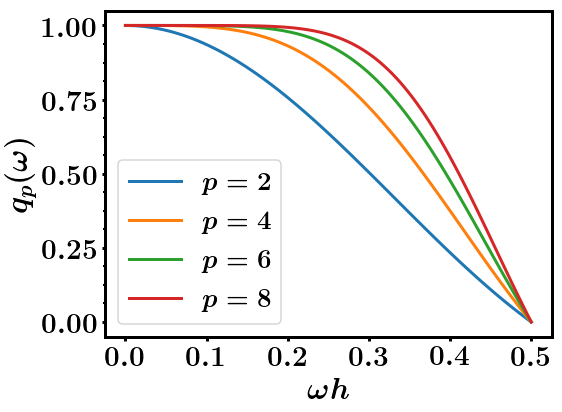

In [38]:
def q(wh, D=2):
    a = 2*np.pi*wh
    if D==2:
        return (1/a) * np.sin(a)
    if D==4:
        return (1/a) * np.sin(a) * (1 + 2/3 * np.sin(a/2)**2)
    if D==6:
        return (1/a) * np.sin(a) * (1 + 2/3 * np.sin(a/2)**2 + 8/15 * np.sin(a/2)**4)
    if D==8:
        return (1/a) * np.sin(a) * (1 + 2/3 * np.sin(a/2)**2 + 8/15 * np.sin(a/2)**4 + 16/35 * np.sin(a/2)**6)

X = np.linspace(0.0001, 0.5, 100)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlabel(r'$\omega h$')
ax.set_ylabel(r'$q_p(\omega)$')
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])

for D in [2, 4, 6, 8]:
    q_values = q(X, D=D)
    ax.plot(X, q_values, label=r'$p={}$'.format(D))

ax.legend(loc='best')
plt.savefig('../../informe/figures/amplification.png')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

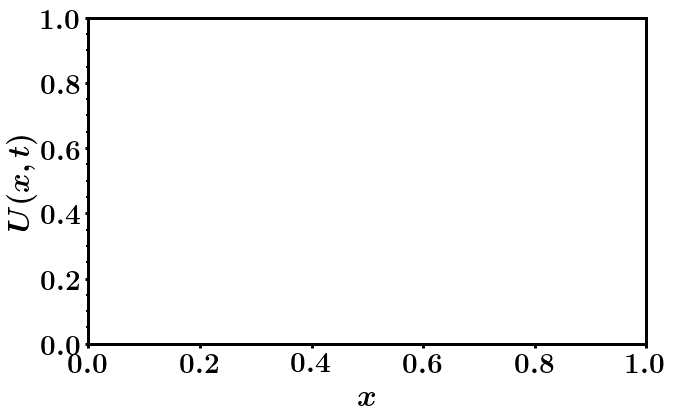

In [3]:
data = pd.read_csv('../Dump/adv_U_501.dat', sep=',', comment='#', names=['U'])
ti = data.index.values[0][0]
tf = data.index.values[-1][0]

ncols = 1
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes
ax.set_ylabel(r'$U(x,t)$')
ax.set_xlabel(r'$x$')
X = data.xs(0).index
X = X/X[-1]
for i in range(ti, tf+1, 10):
    ax.plot(X, data.xs(i).values, label=r'$t = {{{}}}$'.format(i))
    
ax.legend(loc='best')
ax.plot()

/media/nahuel/datos/d/anaconda3/envs/networks3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


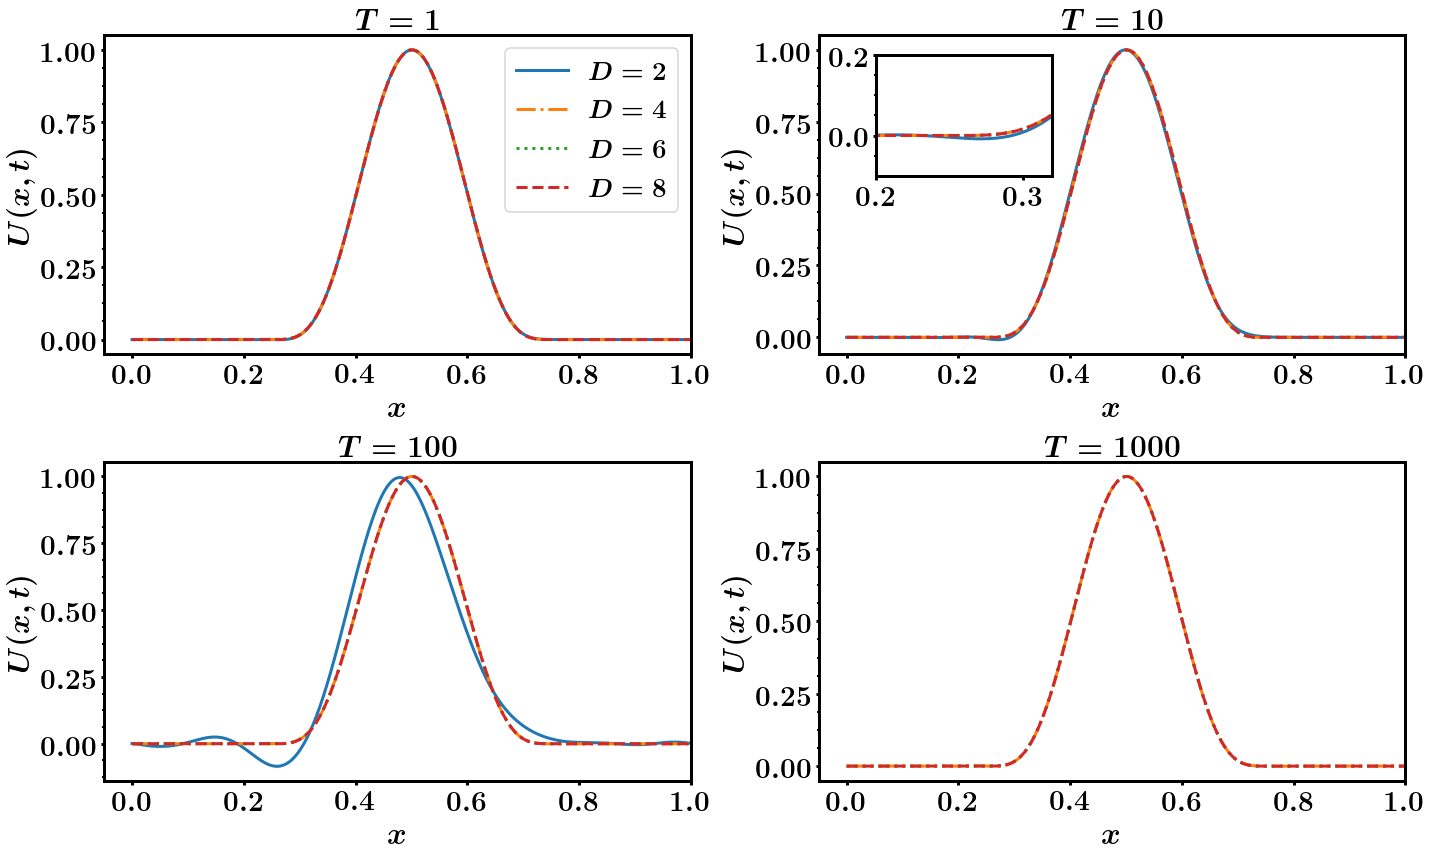

In [40]:
inset = False

grid = 501
T = 1000
dataSteps = 1000
intSteps = 1000


linestyles = ['-', '-.', ':', '--']
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()

ti = 0
for i, tf in enumerate([1, 10, 100, 1000]):
    ax = axes[i]

    inset = True if tf == 10 else False
    
    if inset:
        axins = inset_axes(ax,
                width="100%", 
                height="100%",
                bbox_to_anchor=(.12, .6, .3, .38),
                bbox_transform=ax.transAxes
            )

    for j, D in enumerate([2, 4, 6, 8]):
        if tf == 1000 and D == 2:
            continue
        if tf == 1:
            label = r'$D = {{{}}}$'.format(D)
        else:
            label = ''
        data_file_name = '../Dump/simple_D{D}_grid{grid}_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
            D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
        )
        data = pd.read_csv(data_file_name, 
                           sep=',', comment='#', names=['U'])


        ax.set_ylabel(r'$U(x,t)$')
        ax.set_xlabel(r'$x$')
        ax.set_xlim(-0.05, 1)
        X = data.xs(0).index
        X = X/X[-1]
        ax.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j], label=label)
        ax.set_title(r'$T = {{{}}}$'.format(tf), fontsize=30)
        
        if inset:
            axins.set_xlim(0.2, 0.32)
            axins.set_ylim(-0.1, 0.2)
            axins.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j])
         
    if label:
        ax.legend(loc='best')
    
plt.tight_layout()
plt.savefig('../../informe/figures/simple.png')
plt.show()

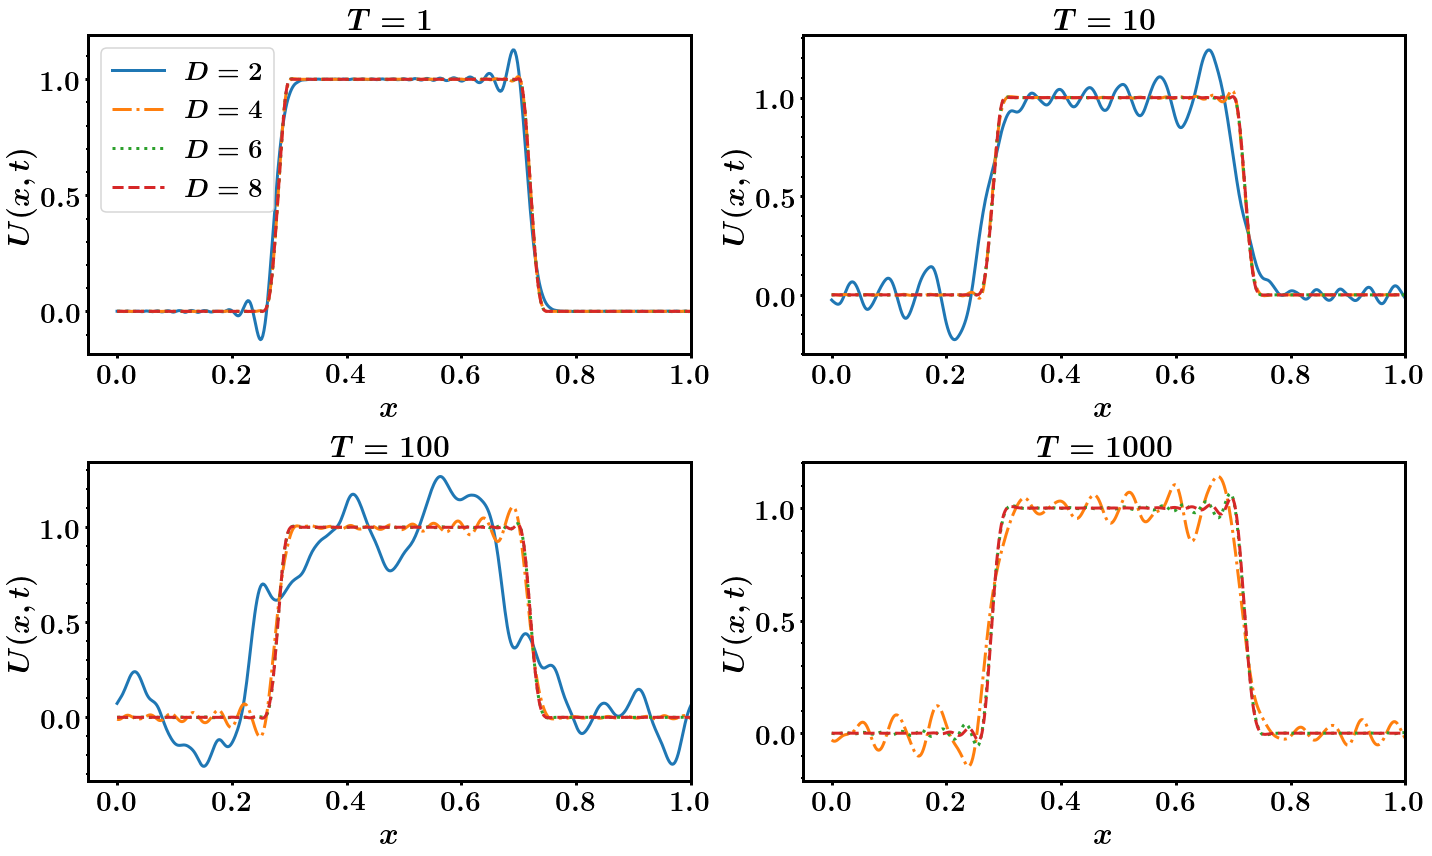

In [39]:
inset = False

grid = 501
T = 1000
dataSteps = 1000
intSteps = 1000


linestyles = ['-', '-.', ':', '--']
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()

ti = 0
for i, tf in enumerate([1, 10, 100, 1000]):
    ax = axes[i]
    if inset:
        axins = inset_axes(ax,
                width="100%", 
                height="100%",
                bbox_to_anchor=(.12, .6, .3, .38),
                bbox_transform=ax.transAxes
            )

    for j, D in enumerate([2, 4, 6, 8]):
        if tf == 1000 and D == 2:
            continue
        if tf == 1:
            label = r'$D = {{{}}}$'.format(D)
        else:
            label = ''
        data_file_name = '../Dump/square_D{D}_grid{grid}_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
            D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
        )
        data = pd.read_csv(data_file_name, 
                           sep=',', comment='#', names=['U'])


        ax.set_ylabel(r'$U(x,t)$')
        ax.set_xlabel(r'$x$')
        ax.set_xlim(-0.05, 1)
        X = data.xs(0).index
        X = X/X[-1]
        ax.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j], label=label)
        ax.set_title(r'$T = {{{}}}$'.format(tf), fontsize=30)
        
        if inset:
            axins.set_xlim(0.2, 0.32)
            axins.set_ylim(-0.1, 0.2)
            axins.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j])
         
    if label:
        ax.legend(loc='best')
    
plt.tight_layout()
plt.savefig('../../informe/figures/square.png')
plt.show()

## Convergencia

In [98]:
def norm_L2(data1, data2):
    
        X = data.xs(0).index
        X = X/X[-1]
        ax.plot(X, data1.xs(tf).values)
                
D = 2
T = 100
dataSteps = 1000
intSteps = 100

grid_values = [101, 201, 401]       
dfs = {}
for grid in grid_values:
    print(intSteps)
    data_file_name = '../Dump/simple_D{D}_grid{grid}_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
        D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
    )
    df = pd.read_csv(data_file_name, sep=',', comment='#', names=['U'])
    dfs[grid] = df
    
    intSteps *= 2
    
    

100
200
400


101


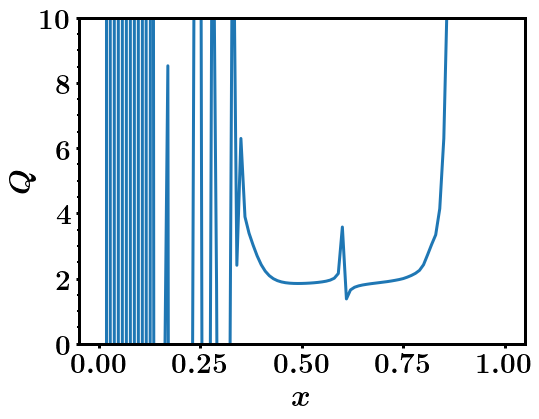

In [92]:
t = 1
N = 101
N2 = 2*N-1
N4 = 2*N2-1
data = dfs[N]
data2 = dfs[N2]
data4 = dfs[N4]

X = np.linspace(0, 1, N)

num = data.xs(t).values - data2.xs(t).values[::2]
denom = data2.xs(t).values[::2] - data4.xs(t).values[::4]

Q = num/denom

print(num.size)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$Q$')
ax.set_ylim(0, 10)
ax.plot(X, Q)

plt.savefig('../../informe/figures/convergencia.png')
plt.show()

1


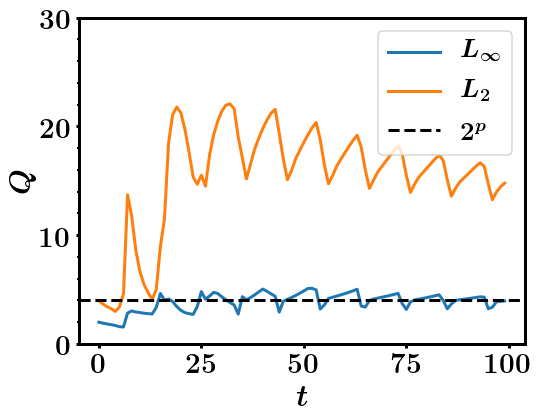

In [96]:
N = 101
N2 = 2*N-1
N4 = 2*N2-1
data = dfs[N]
data2 = dfs[N2]
data4 = dfs[N4]

X = np.linspace(0, 1, N)
time = np.arange(100)
Q_values = {}
Q_values['Linf'] = []
Q_values['L2'] = []
for t in time:
    num = np.max(np.abs(data.xs(t).values - data2.xs(t).values[::2]))
    denom = np.max(np.abs(data2.xs(t).values[::2] - data4.xs(t).values[::4]))
    Qi = num/denom
    Q_values['Linf'].append(Qi)
    
    num = np.sum((data.xs(t).values - data2.xs(t).values[::2])**2)
    denom = np.sum((data2.xs(t).values[::2] - data4.xs(t).values[::4])**2)
    Qi = num/denom
    Q_values['L2'].append(Qi)

print(num.size)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$Q$')
ax.set_ylim(0, 30)
ax.plot(time, Q_values['Linf'], label=r'$L_{\infty}$')
ax.plot(time, Q_values['L2'], label=r'$L_2$')
ax.axhline(2**D, linestyle='--', color='k', label=r'$2^p$')
ax.legend()
plt.savefig('../../informe/figures/convergencia_tiempo.png')
plt.show()

## Disipacion

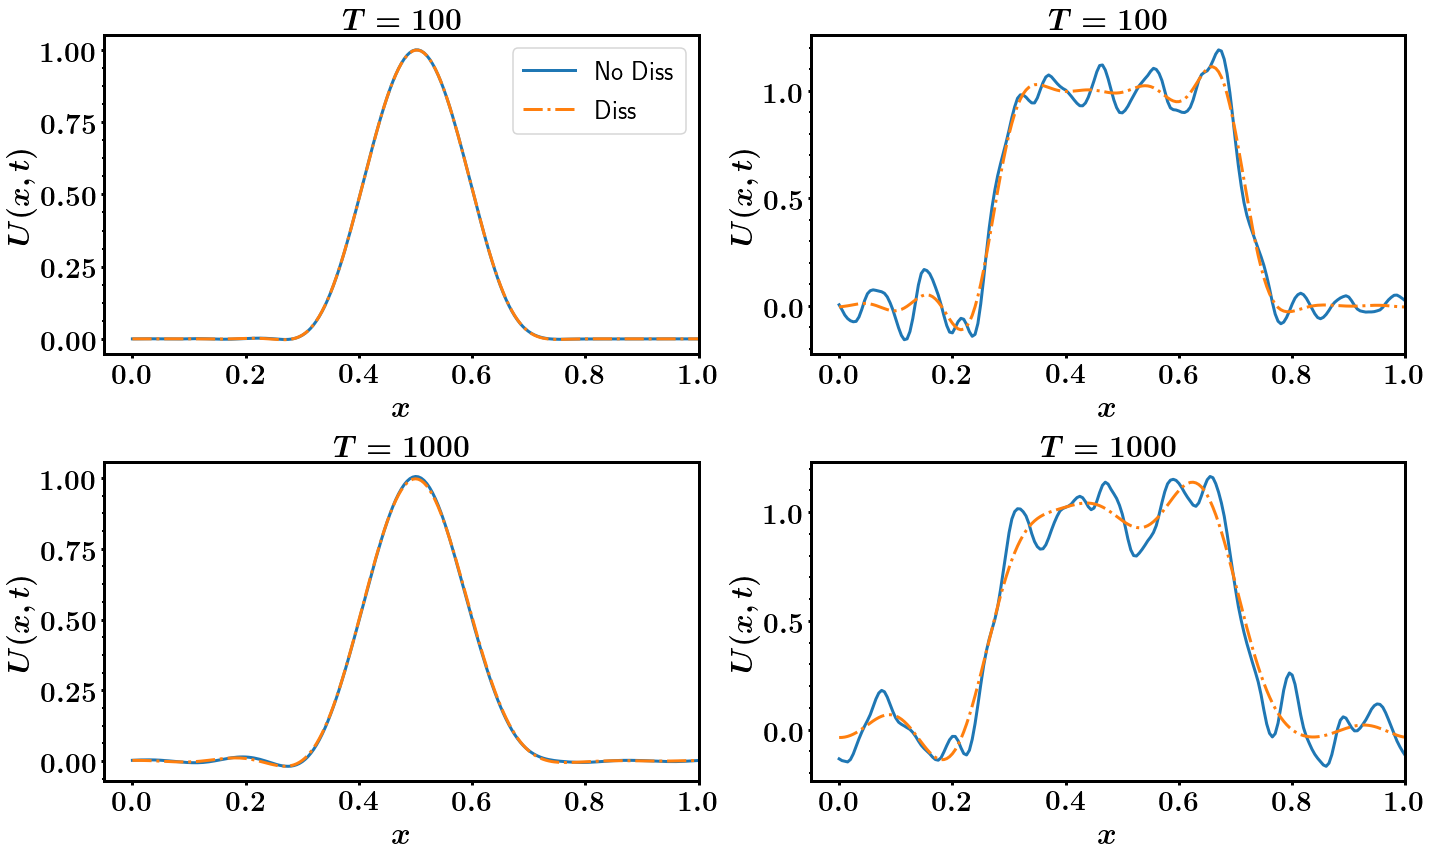

In [104]:
inset = False

D = 4
grid = 201
T = 1000
dataSteps = 1000
intSteps = 10000

labels = ['No Diss', 'Diss']
linestyles = ['-', '-.', ':', '--']
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ti = 0
for k, bump in enumerate(['simple', 'square']):
    for i, tf in enumerate([100, 1000]):
        ax = axes[i,k]
        for j, diss in enumerate(['', 'diss_']):
            if tf == 1000 and D == 2:
                continue
            if i == 0 and k == 0:
                label = labels[j]
            else:
                label = ''
            data_file_name = '../Dump/{diss}{bump}_D{D}_grid{grid}_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
                diss=diss, bump=bump, D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
            )
            
            data = pd.read_csv(data_file_name, 
                               sep=',', comment='#', names=['U'])

            ax.set_ylabel(r'$U(x,t)$')
            ax.set_xlabel(r'$x$')
            ax.set_xlim(-0.05, 1)
            X = data.xs(0).index
            X = X/X[-1]
            ax.plot(X, data.xs(tf).values, linestyle=linestyles[j], color=colors[j], label=label)
            ax.set_title(r'$T = {{{}}}$'.format(tf), fontsize=30)

        if label:
            ax.legend(loc='best')
    
plt.tight_layout()
plt.savefig('../../informe/figures/diss.png')
plt.show()

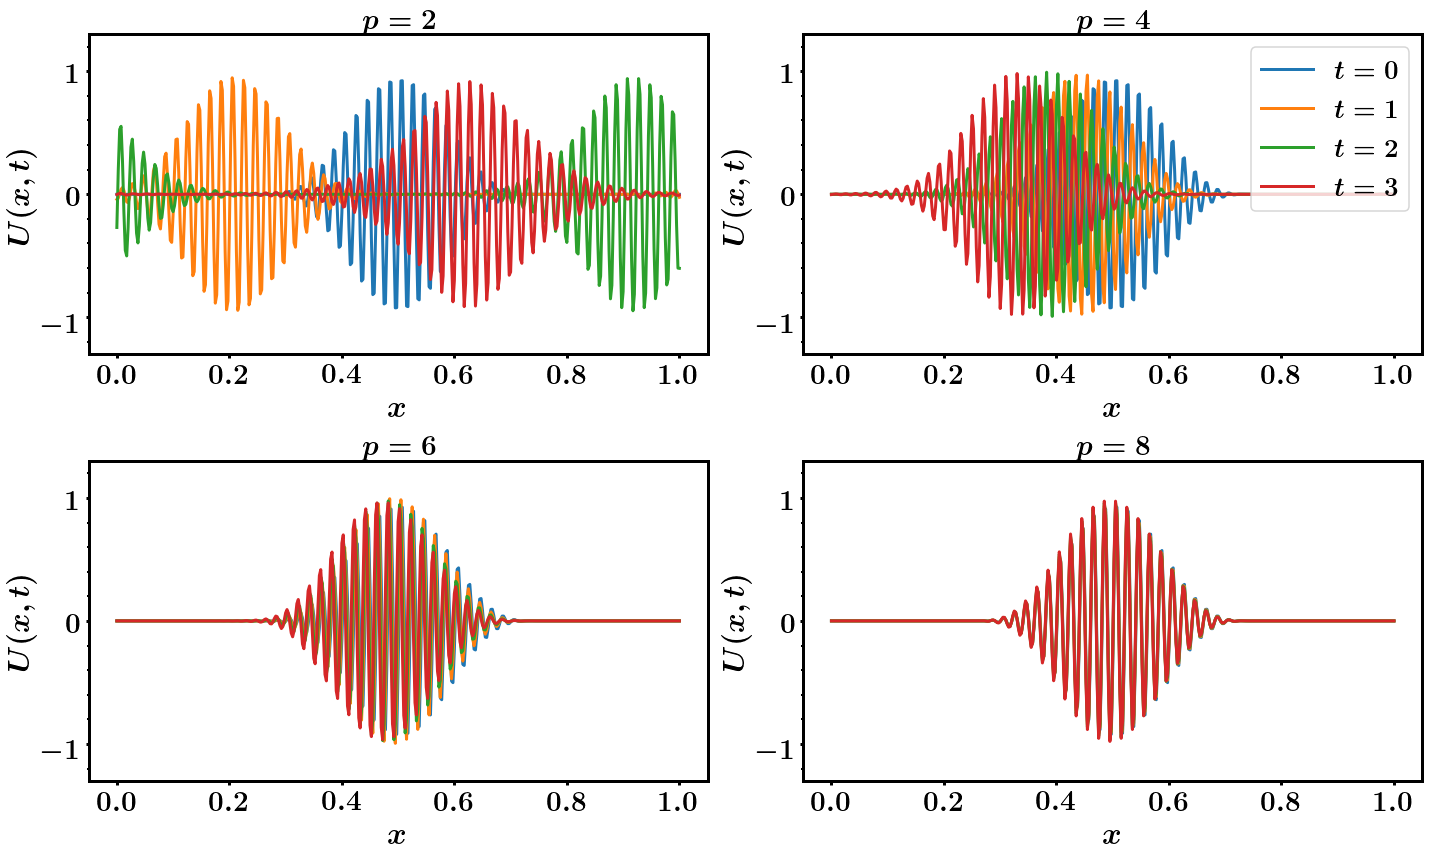

In [127]:
grid = 401
D = 4
dataSteps = 100
T = 100
intSteps = 10000
envolv = 'omega50_'
#envolv = ''

ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(10*ncols, 6*nrows), ncols=ncols, nrows=nrows)
axes = axes.flatten()
for j, D in enumerate([2, 4, 6, 8]):
    ax = axes[j]
    ax.set_ylim(-1.3, 1.3)
    data_file_name = '../Dump/{envolv}simple_D{D}_grid{grid}_T{T}_dataSteps{dataSteps}_intSteps{intSteps}.dat'.format(
        envolv=envolv, D=D, grid=grid, T=T, dataSteps=dataSteps, intSteps=intSteps
    )
    data = pd.read_csv(data_file_name, sep=',', comment='#', names=['U'])
    ti = data.index.values[0][0]
    tf = data.index.values[-1][0]

    ax.set_ylabel(r'$U(x,t)$')
    ax.set_xlabel(r'$x$')
    X = data.xs(0).index
    X = X/X[-1]
    for i in range(0, 4):
        ax.plot(X, data.xs(i).values, label=r'$t = {{{}}}$'.format(i))
    ax.set_title(r'$p = {{{}}}$'.format(D), fontsize=28)
    if j == 1:
        ax.legend(loc=1)
plt.tight_layout()
plt.savefig('../../informe/figures/envolvente.png')
plt.show()